<a href="https://colab.research.google.com/github/rajatdeveloper/Predict-Stock-Price-Trend/blob/master/Stock_Price_Trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

# Data Load



In [0]:
'''
This function loads the data
'''
def loadData(filename):
    from google.colab import drive
    drive.mount('/content/gdrive')
    rawData = pd.read_csv('/content/gdrive/My Drive/AssessmentTest_ML/'+filename)
    #rawData = pd.read_csv(filename)
    closePrice = np.array(rawData.loc[:, [' CLOSE']])
    return   closePrice[:,0]

'''
This function extracts X and Y data where X is the price for past n days
n = lookback for this func., Y is price for the next m days.
m = f_horizon for this func
NOTE: WE ARE NOT USING FUNCTION FOR THIS EXERCISE. THIS IS JUST FOR YOUR LEARNING
'''
def create_dataset(closePrice,look_back,f_horizon):    
    dataX = []
    dataY = []        
    for i in range(0,len(closePrice)-look_back-f_horizon,1):
        a = closePrice[i:i+look_back]
        b = closePrice[i+look_back:i+look_back + f_horizon]               
        dataX.append(a.tolist())
        dataY.append(b.tolist())
    return dataX, dataY

'''
This function extracts X and Y data where X is the price for past n days
n = lookback for this func., Y is the labels that can have 3 values -1, 0, 1
-1 denotes a drop in stock price, 0 denotes no change, and 1 denotes an increase in stock price. 
'''
def create_dataset_discrete(closePrice,look_back):    
    dataX = []
    dataY = []
    dataY_raw = []
    for i in range(0,len(closePrice)-look_back-1,1):
        a = closePrice[i:i+look_back]
        b = (closePrice[i+look_back] - closePrice[i+look_back-1])/ (closePrice[i+look_back-1]) * 100
        # b is the percentage change in price for the next day
        
        labels = 0
        if b > 0.25:
            labels = 1
        elif b < -0.25:
            labels = -1
        dataX.append(a.tolist())
        dataY.append(labels)
        dataY_raw.append(b)
    return dataX, dataY, dataY_raw


# Preprocessing


In [0]:
# Create Normalized Dataset
def create_normalized_dataset(dataX):
    # you may want to add your code to normalize the dataset 
    dataX = preprocessing.normalize(dataX)
    return dataX

# Create Normalized Dataset
def preprocessData(dataX, dataY):
    dataX = np.array(dataX)
    dataY = np.array(dataY)
    return dataX,dataY
  
# Create Normalized Dataset
def extractFeatures(dataX):
    # you may generate some features such as moving averages, Relative strength index etc    
    period = 21
    T = len(dataX[0])
    for i in range(0, len(dataX)):
    #calculate moving averages
        sum_ = 0
        for j in range(T-period-1,T):
          sum_ = sum_ + dataX[i][j]
        dataX[i].append(round(sum_/period, 2))
  
    #calculate RSI
        gains = 0.0
        losses = 0.0        
        for j in range(T-period,T):
            diff = dataX[i][j] - dataX[i][j-1]

            if diff > 0:
                gains += diff
            elif diff < 0: 
                losses += abs(diff)
        dataX[i].append(round(100 - (100 / (1 + gains / losses)), 2))
    return dataX


# This func. create train and test data. Given the entire dataset
# Note that the code doesn't shuffle the data
def createData_TrainTest(dataX, dataY, percent_train_data):
    num_training_data = int (len(dataY)*percent_train_data)
    idx = np.arange(0 , len(dataY))
    #np.random.shuffle(idx)  # Shuffling can provide future info.
    # Extract Test and Train data
    trainX = [dataX[i] for i in idx[0:num_training_data]]
    testX  = [dataX[i] for i in idx[num_training_data:]]
    trainY = [dataY[i] for i in idx[0:num_training_data]]
    testY =  [dataY[i] for i in idx[num_training_data:]]  
    
    return trainX, trainY, testX, testY


# Classifiers

In [0]:
'''
This function is just an example for naive bayes implementation.
It takes the training features and labels as input and learns a
decision tree model using SKLearn's naive bayes algorithm. It runs 10-fold
cross-validation on the training data to identify the best depth.

PLEASE DONT USE THIS FUNCTION. THIS FUNCTION IS BY NO MEAN A GUIDELINE FOR YOUR CODE.
THIS FUNCTION IS ONLY INCLUDED FOR YOUR LEARNING
'''
def learn_naive_bayes(X, y):
    # This list tracks the learned decision tree with the best accuracy
    best_model = [ None, float("-inf") ]
    # Create the object that will split the training set into training and
    # validation sets
    kf = KFold(n_splits=10)
    # Iterate over each of the 10 splits on the data set
    for train, test in kf.split(X):
        # Pull out the features and labels that will be used to train this model
        train_X = [ X[dp] for dp in train ]
        train_y = [ y[dp] for dp in train ]
        # Pull out the features and labels that will be used to validate this
        # model
        valid_X = [ X[dp] for dp in test ]
        valid_y = [ y[dp] for dp in test ]
        # Create the decision tree object
        clf = GaussianNB()
        # Learn the model on the training data that will be used for this
        # fold
        clf = clf.fit(train_X, train_y)
        
        # Evaluate the learned model on the validation set
        accuracy = clf.score(valid_X, valid_y)
        # Check whether or not this learned model is the most accuracy model
        if accuracy > best_model[1]:
            # Update best_model so that it holds this learned model and its
            # associated accuracy and hyper-parameter information
            best_model = [ clf, accuracy ]
    return best_model


def MLClassifier(X,y):
    # code as many classifier as you want. You can have as many functions for classifier as you need
    # you can also write Neural network function if you are interested
    # This list tracks the learned decision tree with the best accuracy
    best_model = [ None, float("-inf") ]
    # Create the object that will split the training set into training and
    # validation sets
    kf = KFold(n_splits=5)
    # Iterate over each of the 10 splits on the data set
    for train, test in kf.split(X):
        # Pull out the features and labels that will be used to train this model
        train_X = [ X[dp] for dp in train ]
        train_y = [ y[dp] for dp in train ]
        # Pull out the features and labels that will be used to validate this
        # model
        valid_X = [ X[dp] for dp in test ]
        valid_y = [ y[dp] for dp in test ]
        # Create the decision tree object
        clf = GaussianNB()
        # Learn the model on the training data that will be used for this
        # fold
        clf = clf.fit(train_X, train_y)
        
        # Evaluate the learned model on the validation set
        accuracy = clf.score(valid_X, valid_y)
        # Check whether or not this learned model is the most accuracy model
        if accuracy > best_model[1]:
            # Update best_model so that it holds this learned model and its
            # associated accuracy and hyper-parameter information
            best_model = [ clf, accuracy ]
    return best_model


# Visualization Tools

In [0]:
def visualize(closePrice):
    # write your visualization tools here: you can code as many functions as you would like
    plt.figure(figsize = (12,6))
    plt.plot(closePrice)
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.title('Stock vs Time')

def hist_visualize(dataY, x_label_name,y_label_name, figure_title):
    n, bins, patches = plt.hist(x=dataY, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel(x_label_name)
    plt.ylabel(y_label_name)
    plt.title(figure_title)
    plt.text(23, 45, r'$\mu=15, b=3$')
    plt.ylim()
    return plt.show()

# helper function:

In [0]:
def helperFunc(closeprice):
    # code other helper functions here that doesn't fall into any of the above categories
    pass

    

# Main Code Here:

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


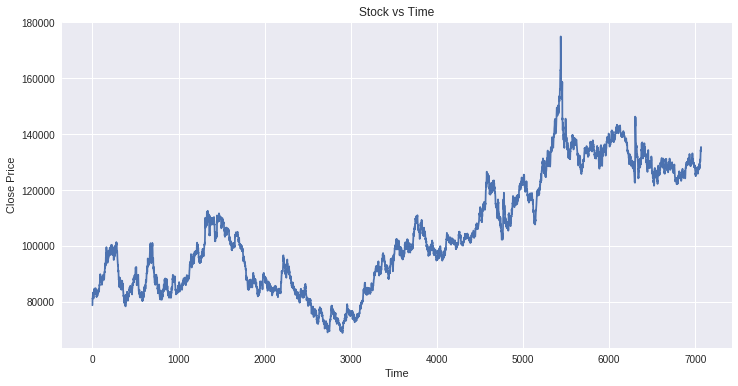

In [46]:
# Input Variable
filename = 'stock_data.txt' # file containing stock data 
look_back = 300  # number of days to lookback to predict the future
percent_train_data = .7 # fraction of training data, .3 = fraction of test data.
                        # we are not dividing into train-test-validation for this problem

closePrice= loadData(filename) # Load closing price of stock from the file. Check below visualization to understand
visualize(closePrice)
'''
extracts X and y data,  where X is the price for past n ( = lookback) days
Y is the labels: -1, 0, 1
-1 denotes a drop in stock price, 0 denotes no change, and 1 denotes an increase in stock price. 
'''
dataX, dataY, dataY_raw = create_dataset_discrete(closePrice,look_back) # dataY_raw in not useful for this exercise



In [0]:

# Start writing your code here: Below added code is just a guideline for your understanding

# you may want to code these functions above. You are allowed to use/ change/ reorder below structure
# dataX is a time series data.
dataX = extractFeatures(dataX)  
dataX,dataY = preprocessData(dataX, dataY)
dataX = create_normalized_dataset(dataX)
trainX, trainY, testX, testY = createData_TrainTest(dataX, dataY, percent_train_data) # split training-testing data
# Check the function above. We are not shuffling the data


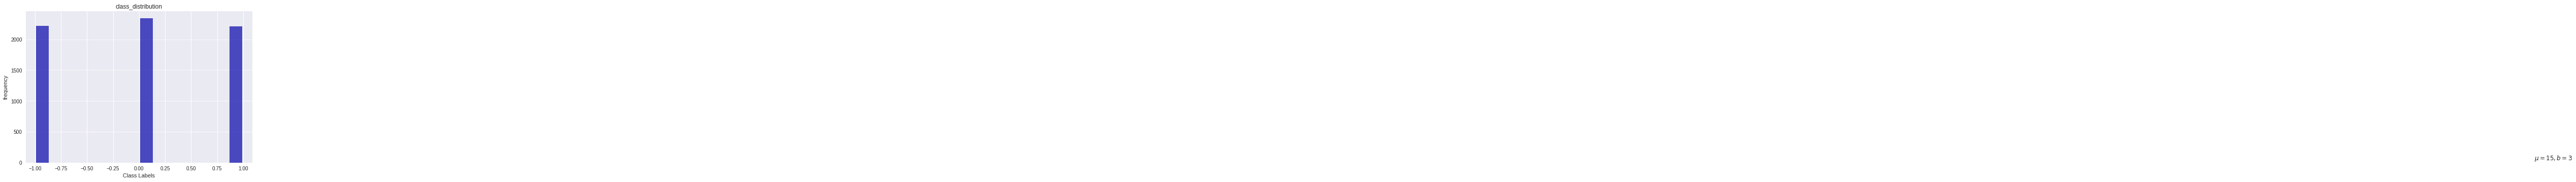

In [48]:
# Data Exploration: This shows that the class distribution is balanced and
# we have almost the same number of labels in all the classess
hist_visualize(dataY, 'Class Labels','frequency', 'class_distribution') # class distribution is good

In [49]:
# THESE Three LINES BELOW ARE JUST EXAMPLES/ please delete or comment these lines in your final submission
Classifier = MLClassifier(trainX, trainY)  
predY = Classifier[0].predict(testX)
accuracy = Classifier[0].score(testX, testY)
cm = confusion_matrix(testY,predY)
print(accuracy)
cm


0.4096504185130478


array([[ 98, 372, 140],
       [ 89, 575, 126],
       [ 87, 385, 159]])